In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
FOLDERNAME = "PUC_Rio/ML/Boston_Housing"
%cd drive/MyDrive/$FOLDERNAME

/content/drive/MyDrive/PUC_Rio/ML/Boston_Housing


In [ ]:
%ls

Boston_Housing.ipynb  submission_example.csv  test.csv  train.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


Loading dataset

In [ ]:
url_train = './train.csv'
url_test = './test.csv'

In [ ]:
train_data = pd.read_csv(url_train)
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
train_data.shape

(333, 15)

To check if there are missing data

In [ ]:
print(train_data.isnull().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


Test dataset is for competition in Kaggle

In [ ]:
# Dataset without true label
test_data = pd.read_csv(url_test)
test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [ ]:
test_data.shape

(173, 14)

In [ ]:
test_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

Split train_dataset into train data and validation data

In [ ]:
test_size = 0.2
seed = 7

array = train_data.values
x = array[:, 0:14]
y = array[:, 14]

In [ ]:
x.shape, y.shape

((333, 14), (333,))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=seed)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((266, 14), (266,), (67, 14), (67,))

In [ ]:
# Normalization
normalizer = MinMaxScaler()
x_train_nor = normalizer.fit_transform(x_train)

Cross validation to evaluate the performance of models

In [ ]:
AdaBoostRegressor,
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=7)

# Global seed
np.random.seed(7)

models = []
results = []
names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('D-Tree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('XGB', XGBRegressor()))

# Defining parameters of base classifier for the BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 4

# Creating models for VotingRegressor
bases = []
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('d-tree', model2))
model3 = SVR()
bases.append(('svm', model3))

# Creating emsembles and add into models list
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('R-Forest', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

In [ ]:
print(models)

[('LR', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('KNN', KNeighborsRegressor()), ('D-Tree', DecisionTreeRegressor()), ('SVM', SVR()), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)), ('Bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)), ('R-Fo

In [ ]:
for name, model in models:
  cv_results = cross_val_score(model, x_train_nor, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

LR: MSE 25.77 (12.85) - RMSE 5.08
Ridge: MSE 25.16 (14.13) - RMSE 5.02
Lasso: MSE 64.42 (32.13) - RMSE 8.03
KNN: MSE 33.11 (18.33) - RMSE 5.75
D-Tree: MSE 25.75 (11.69) - RMSE 5.07
SVM: MSE 42.50 (30.48) - RMSE 6.52
XGB: MSE 11.56 (5.85) - RMSE 3.40
Bagging: MSE 11.60 (6.39) - RMSE 3.41
R-Forest: MSE 11.40 (6.72) - RMSE 3.38
Ada: MSE 14.25 (7.36) - RMSE 3.77
GB: MSE 9.97 (4.21) - RMSE 3.16
Voting: MSE 19.87 (12.38) - RMSE 4.46


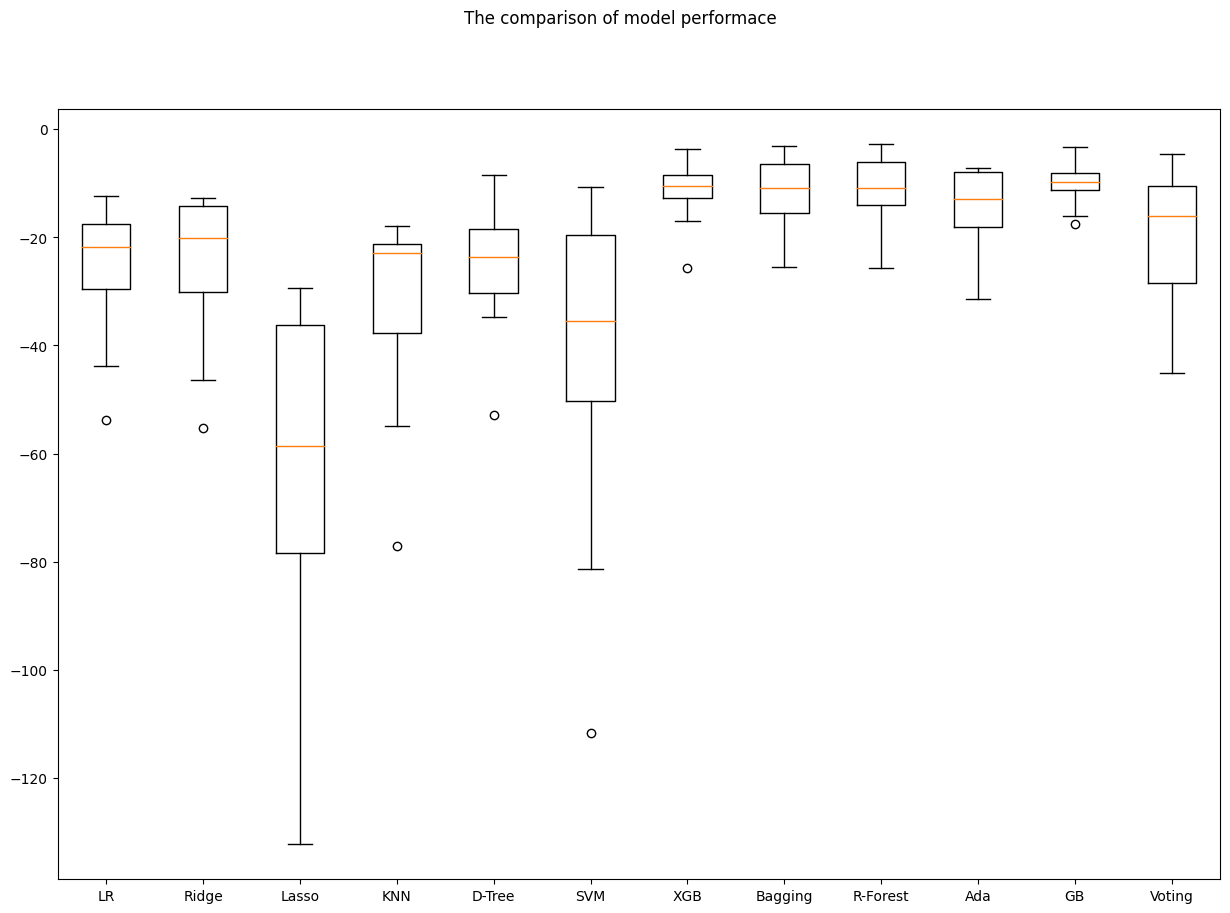

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('The comparison of model performace')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Traning choiced models

Setting pipeline

In [ ]:
np.random.seed(7)

pipelines = []
pipelines.append(('SVM', Pipeline(steps=[('normalization', MinMaxScaler()), ('svm', SVR(kernel='rbf'))])))
pipelines.append(('XGB', Pipeline(steps=[('normalization', MinMaxScaler()), ('xgb', XGBRegressor())])))
pipelines.append(('Bagging', Pipeline(steps=[('normalization', MinMaxScaler()), ('bagging', BaggingRegressor(base_estimator=base))])))
pipelines.append(('Forest', Pipeline(steps=[('normalization', MinMaxScaler()), ('forest', RandomForestRegressor())])))

In [ ]:
# print(pipelines)

Using Grid Search to perform hyperparameter optimization

In [ ]:
# Setting parameters
params = []
params.append(('SVM', {'svm__C': [200, 210, 220, 230, 240, 250, 260, 270, 280, 300], 'svm__epsilon': [1.0], 'svm__gamma': [0.8, 0.9, 1.0]}))
params.append(('XGB', {'xgb__n_estimators': [5000, 10000], 'xgb__max_depth': [2,3], 'xgb__learning_rate': [0.01, 0.05]}))
params.append(('Bagging', {
    'bagging__n_estimators': [50, 100, 200, 300],
    'bagging__max_samples': [0.5, 0.7, 0.9, 1.0],
    'bagging__max_features': [0.5, 0.7, 0.9, 1.0]}))
params.append(('Forest', {
    'forest__n_estimators': [50, 100, 200, 300],
    'forest__max_depth': range(3, 5),
    'forest__min_samples_leaf': range(2, 4),
    'forest__max_leaf_nodes': range(9, 13)}))

In [ ]:
# To get parameters according to model
def params_grid(name):
  for title, param in params:
    if title == name:
      return param

In [ ]:
from sklearn.model_selection import GridSearchCV

best_model = []
for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=params_grid(name), scoring='neg_mean_squared_error', cv=kfold)
  grid.fit(x_train, y_train)

  print('%s - better: %f using %s' % (name, grid.best_score_, grid.best_params_))
  best_model.append(grid.best_estimator_)

SVM - better: -11.243696 using {'svm__C': 280, 'svm__epsilon': 1.0, 'svm__gamma': 0.8}
XGB - better: -9.820777 using {'xgb__learning_rate': 0.01, 'xgb__max_depth': 2, 'xgb__n_estimators': 5000}
Bagging - better: -10.467721 using {'bagging__max_features': 0.9, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 100}
Forest - better: -14.658183 using {'forest__max_depth': 4, 'forest__max_leaf_nodes': 11, 'forest__min_samples_leaf': 2, 'forest__n_estimators': 50}


In [ ]:
# Saving predictions of test datas into cvs file for Kaggle competion
def out_file(predictions, filename):
	data = pd.read_csv(url_test)
	id = data.ID

	print('\n=============================================')
	print(f'Writing test predictions to --> {filename}')
	with open(filename, 'w') as out:
		out.write('ID,medv\n')
		for i in range(len(id)):
			out.write(str(id[i])+','+str(predictions[i])+'\n')
	print('================================================')

SVR_RMS - Validation Error: 12.395851086407951

Writing predictions to --> SVR.csv
XGBRegressor_RMS - Validation Error: 14.259697396229846

Writing predictions to --> XGBRegressor.csv
BaggingRegressor_RMS - Validation Error: 12.56998264179105

Writing predictions to --> BaggingRegressor.csv
RandomForestRegressor_RMS - Validation Error: 13.649144059210414

Writing predictions to --> RandomForestRegressor.csv


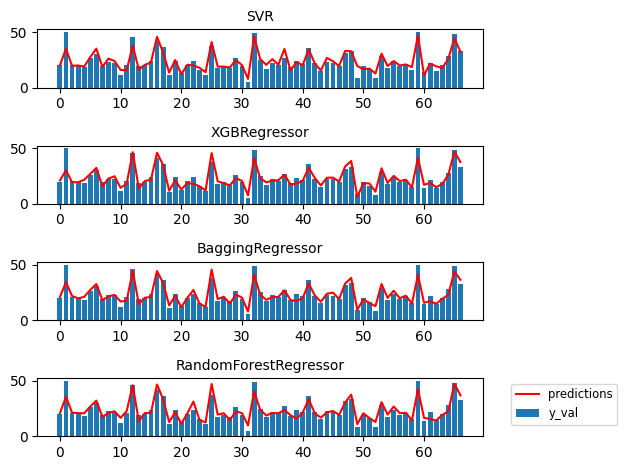

In [ ]:
# Get predition of val data and test data for models selected
for i, estimator in enumerate(best_model):
    model_name = type(list(estimator.named_steps.values())[1]).__name__

    predictions = estimator.predict(x_val)
    validation_error = mean_squared_error(y_val, predictions)
    print(f"{model_name}_RMS - Validation Error: {validation_error}")

    prediction_test = np.around(estimator.predict(test_data), decimals=13)
    out_file(prediction_test, f'{model_name}.csv')

    # y_val
    plt.subplot(len(best_model), 1, i+1)
    plt.bar(range(len(y_val)), y_val, label='y_val')

    # predictions(red)
    plt.plot(range(len(predictions)), predictions, color='red', label='predictions')

    # plt.legend(fontsize='small')

    plt.title(f"{model_name}", fontsize='medium')

    plt.subplots_adjust(hspace=1.0)

plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# space between subplots
plt.tight_layout()

plt.show()


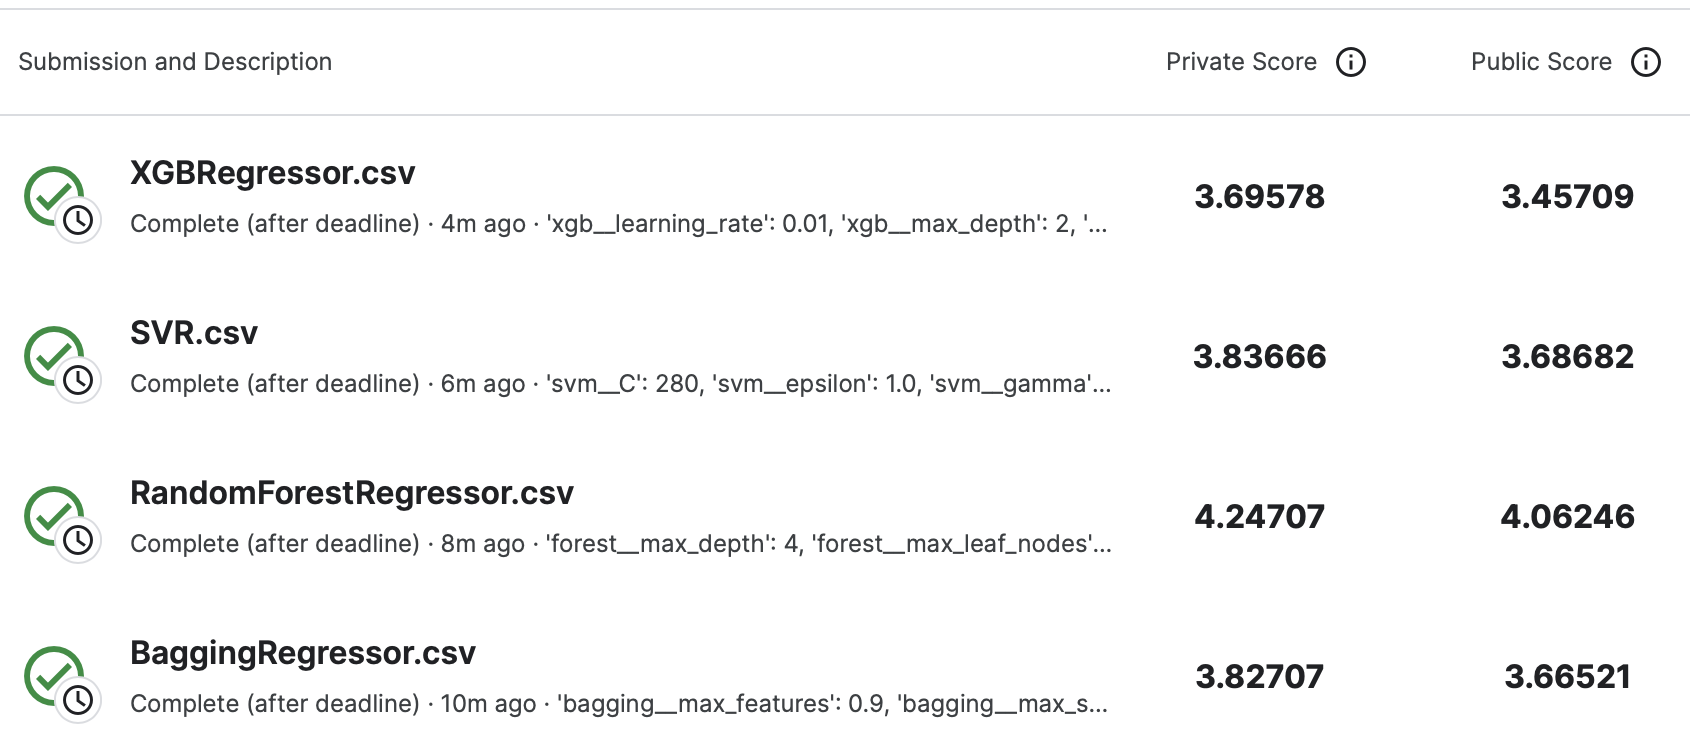
